Welcome to the hands-on lab for **Using Static Analysis! Static analysis** is a debugging method that automatically inspects source code before execution. In this lab, you will learn more about static analysis and how to install, configure, and use SonarQube for static analysis of your project code.

# Learning Objectives

By the end of this lab, you will be able to:
* Describe the benefits of using static analysis
* Install and configure SonarQube
* Run static analysis scans
* Interpret security reports from SonarQube

# Understanding Static Code Analysis

Static code analysis, a debugging method that inspects source code, is performed in a non-runtime environment, meaning it examines the code without executing the program. This practice is also known as source code analysis.

While testing is traditionally carried out by the coder running the program, source code analysis can be done even before a program has been finished. This gives developers the advantage of catching any mistakes early.

Source code analysis tools, also known as **Static Application Security Testing (SAST)** tools, analyze your source code to find security flaws. SAST tools can be added to your IDE. They can help you detect issues during software development and can save time and effort, especially when compared to finding vulnerabilities later in the development cycle.

In the next section, you will use **SonarQube**, an open-source platform built by SonarSource for continuous code quality assessment. It can integrate with your existing workflow to enable continuous code inspection across your project branches and pull requests.

# Getting Started

While you might already have a dedicated SonarQube stage set up in your CI/CD pipeline, it is useful to know how to run SonarQube locally. By doing this, you can shorten the feedback loop to change code, run scans, and view results.

In this lab, you will be guided through setting up SonarQube and using it to run analysis of an application in the Cloud IDE with Docker. Everything can be done in the terminal on the right panel. You should be able to replicate this lab easily in any environment that has Docker installed, including your own developer workstation.

To get a SonarCube server up and running, you will:
1. Create a Docker network for SonarQube and PostgreSQl to communicate on
2. Set up PostgreSQL running in a Docker container
3. Set up SonarQube running in a Docker container
4. Download the SonarQube scanner Docker image
5. Set up an alias to run scans using the **`sonar-scanner-cli`** Docker container
6. Scan some code and interpret the results

Click **Next** to get started.

# Step 1: Setup PostgreSQL database

* SonarQube depends on a database to work correctly.
* While SonarQube can run in a docker container without a database, when the container is deleted, all of the data is deleted with it.
* This may be fine for quick development scans, but if you want to build history over time, it is a best practice to use an external database, even for local development.

In this lab, we will use the PostgreSQL database by pulling its docker image. Before we do that, we will need a Docker network to connect the database to SonarQube and, later, the SonarScanner. This will be your first task.

## Your Task

1. Open a terminal from the top menu bar by selecting **`Terminal -> New Terminal`**

2. Next, from the terminal shell, run the **`docker network`** command to create a **docker network** called **`mynet`**.

```
docker network create mynet
```

The docker network that you created is called **`mynet`**, which will be used to establish a communication between the PostgreSQL container and the SonarQube container that you will create later.

3. Finally, use the **`docker run`** command to create a PostgreSQL docker container:

```
docker run --name postgres  -e POSTGRES_USER=root -e POSTGRES_PASSWORD=Test12345  -p 5432:5432 --network mynet -d postgres
```

You will see that simply by requesting to run the container, Docker knows to download the image. You should see a lot of output about downloading and expanding the layers of the Docker image for **`postgres`**.

## Results

Your final output should look something like this:

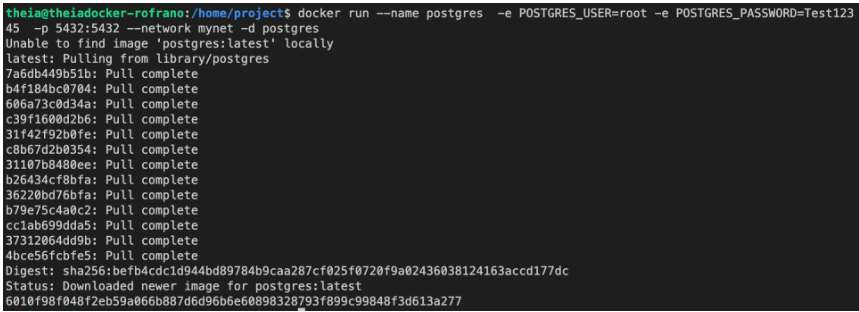

# Step 2: Setup SonarQube server

* Now that we have the PostgreSQL database running, we can create the SonarCube server and attach it to the database. 
* To avoid having to install SonarQube and have the proper Java environment to run it, you will use a Docker container for running your SonarQube server.
* Luckily, SonarQube provides one that you can use.

## Your Task

Use the following docker run command to run a SonarQube docker container on port 9000:

```
docker run -d --name sonarqube -p 9000:9000 -e sonar.jdbc.url=jdbc:postgresql://postgres/postgres -e sonar.jdbc.username=root -e sonar.jdbc.password=Test12345 --network mynet sonarqube
```

* This command uses the `-p` flag to expose port `9000` for SonarQube to communicate outside of the container. 
* It also sets several environment variables with the `-e` command. 
* Using Docker to run the server on your desktop gives you an enormous amount of freedom and flexibility as a developer.

Again you will see the layers of the SonarQube docker image be downloaded and extracted. Your final output should look something like this:

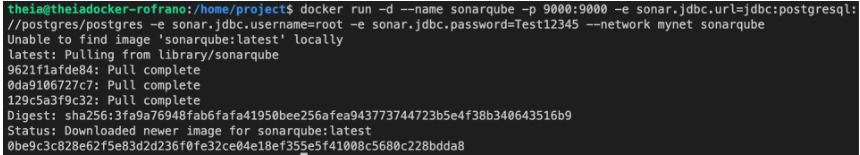


## Check for Success

Now that both PostgreSQL and SonarQube images have been downloaded, and both containers have been started, you can use the **`docker ps`** command to check that they are running.

Use the **`docker ps`** command to check the containers.

You should see similar output to the following with a container named **`postgres`** and a container named **`sonarqube`**:

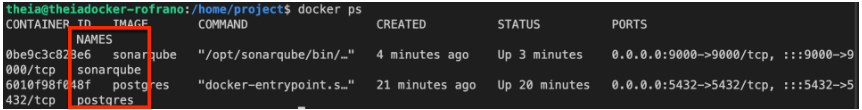

Congratulations! Your SonarQube should now be up and running!

You’ve now completed the installation part, and you are ready to move on to generating a scanner token for your project!

# Step 3: Log in to SonarQube

* You are now ready to use SonarQube.

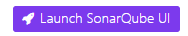

* You can launch the web UI by clicking the **`[Launch SonarQube UI]`** button below. 
* It may take a while for SonarQube to start.

> **Note:** You might want to open this web page in your browser instead of the Cloud IDE because the SonarQube UI is quite large, and it may be difficult to navigate using Cloud IDE browser. Once you click Launch SonarQube UI, there will be an arrow icon in the upper-right of the terminal panel that will open a new page for you.

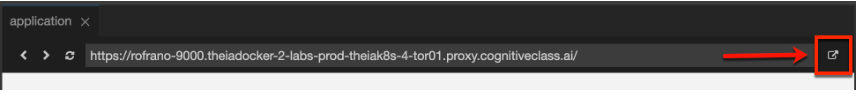


## Change credentials

Use the following default credentials to login into the SonarQube.

```
username: admin
password: admin
```

* Then click the **`[Log in]`** button. 
* Once you have logged in, you will be prompted to change your password.

> *Note: Don’t forget to save your new password!*

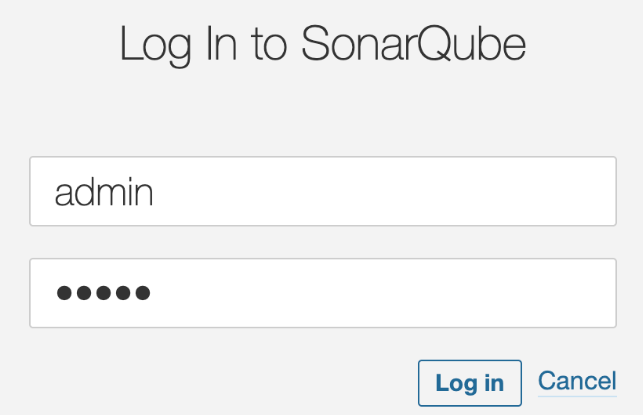

Once you have finished resetting the password, you will be directed to the home page of SonarQube.

**New Password: `Sonarqube@1994`**

# Step 4: Create a SonarQube Project

* To run the SonarQube scanner on your code, you will first need to create a project token. 
* There are many ways to create a token, but for this lab, you will use the **manual** setup.
* Click on the **Manually** icon on the bottom left.

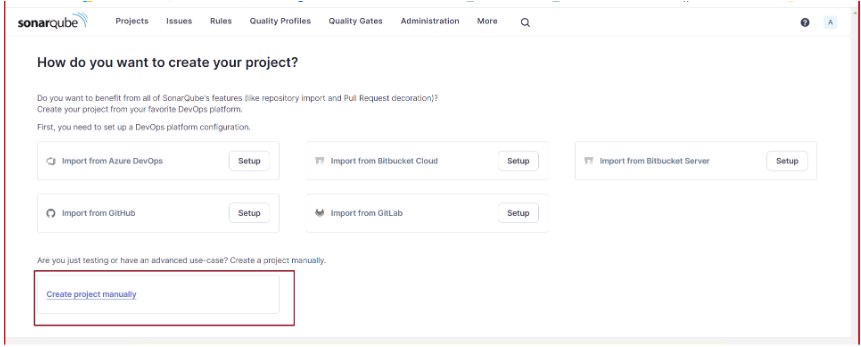

On the next page, create a project by following these steps:

1. Set the project display name to **`temp`**.
2. Set the project key to **`temp`** (this will happen by default).
3. Ensure the **`main`** branch is selected
4. Press the **`Next`** button to continue.

> *Note: If you get an error message, try again.*

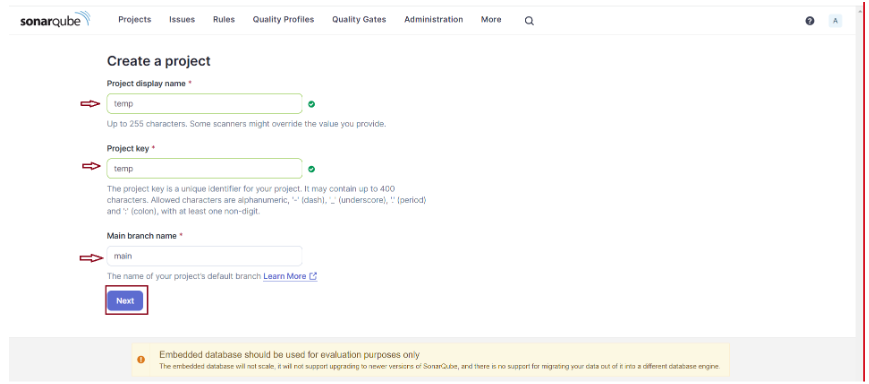

Please select **`Use the global setting`** and then click on **`Create project`**.

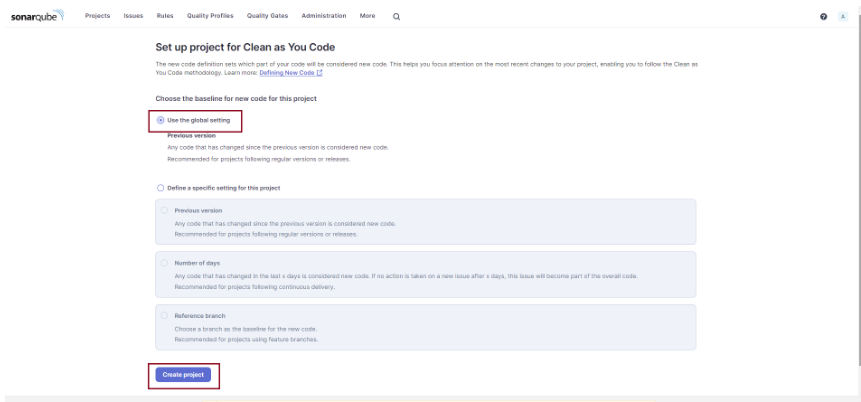

On the next page, where it asks how you want to analyze your repository, select the **`Locally`** option.

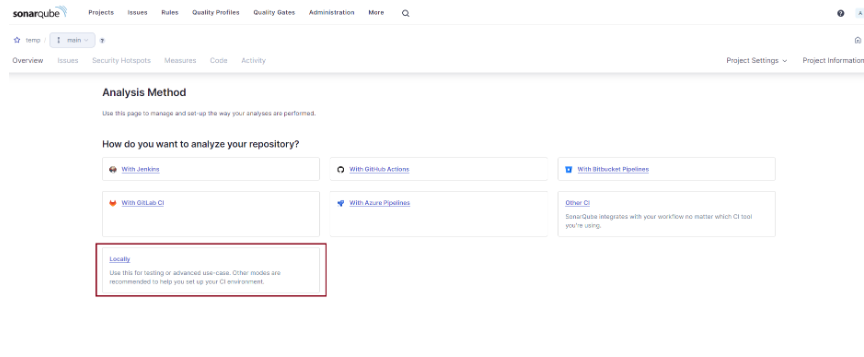

In the next step, you will generate a token for your project.

# Step 5: Generate SonarQube Scanner Token

* Before you can scan your code, you will need to generate a token.
* You can generate a token on the **Analyze your project** page at the **Provide a token** step.
* Click the **Generate** button.

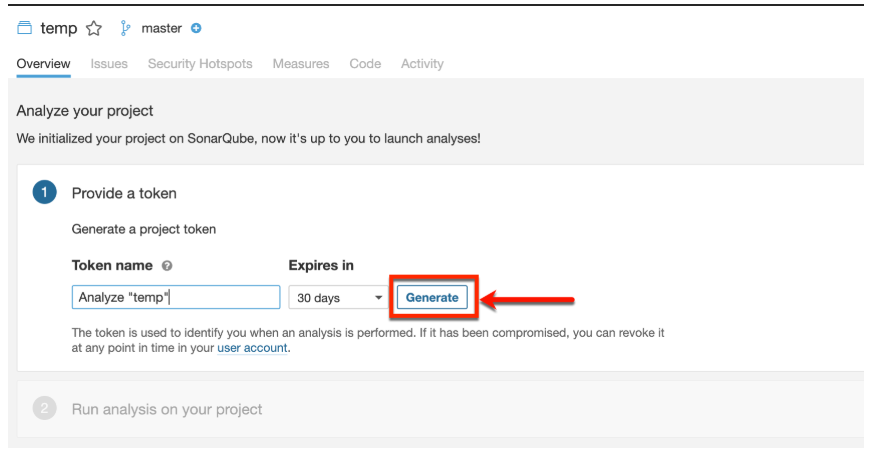

**Analyze "temp": `sqp_2f6947690c49e467be33f073377e47a06d9fa501`**



* Next, you will see the token that has been generated. 
* You want to highlight the token text, copy it, and then paste it in a safe place. 
* You will need it later to submit your scans.
* Then click the **Continue** button.

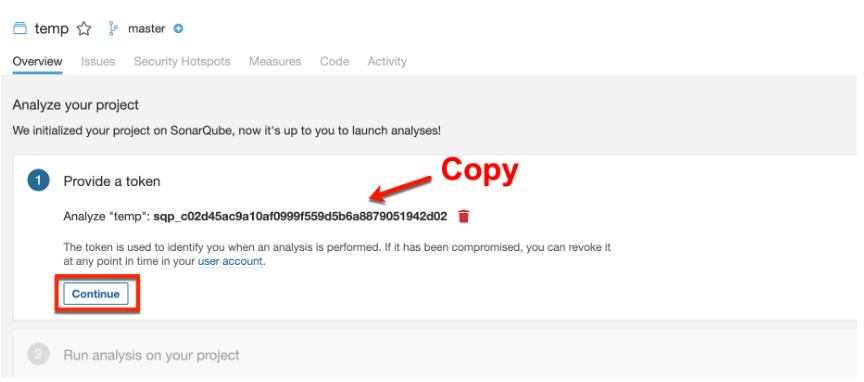

This will take you to a page where you will need to answer some questions about your project’s configuration, such as the language and the operating system (OS) used.

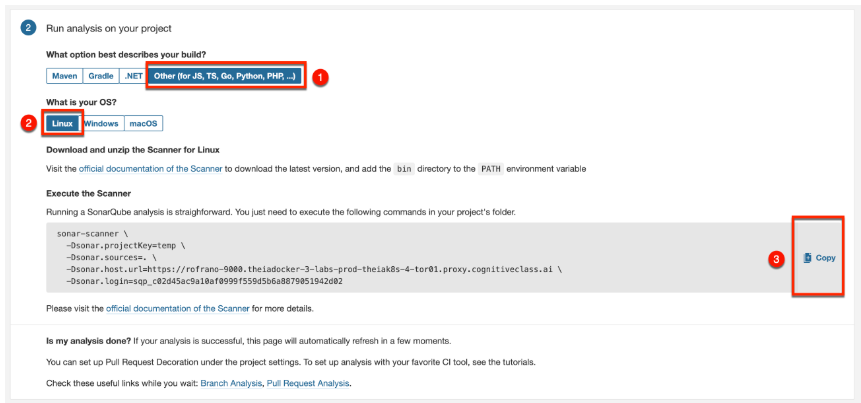

For the selections, you must choose:
1. Other, (for JS, TS, Go, Python. PHP, …)
2. Linux
3. Copy

```
sonar-scanner \
  -Dsonar.projectKey=temp \
  -Dsonar.sources=. \
  -Dsonar.host.url=https://paulkiranmoy-9000.theiadockernext-1-labs-prod-theiak8s-4-tor01.proxy.cognitiveclass.ai \
  -Dsonar.token=sqp_2f6947690c49e467be33f073377e47a06d9fa501
```

## Important!

* It is very important to copy this command to a safe place! 
* You will see the command that is generated so that you can run the scanner on your code.
* This command is unique to your project.
* Make sure that you save that command somewhere since you will be needing it in a future step!

# Step 6: Ready the SonarQube Scanner

It is important to understand that the SonarQube server that stores the results of scans is separate and distinct from the SonarQube scanner which performs the actual scanning. Up until now, we’ve created a database for storing the analysis results and provisioned a SonarQube server for serving the UI.

To get the SonarQube scanner to work in the Cloud IDE, you can either install it locally or pull its docker image and run its docker container. In this lab, you will be pulling the docker image and running its docker container.

# Your Task

1. First, we will use the **`docker pull`** command to download the **`sonarsource/sonar-scanner-cli`** image from Docker hub so that it is available locally for use.

```
docker pull sonarsource/sonar-scanner-cli
```

> *Note: If you don’t pull the image, it will be pulled the first time you run the scanner. We are doing this now to save time later.*

Run the following bash **`alias`** command in the terminal, which creates an alias **`sonar-scanner`** for running the scanner later using the **`scanner-cli`** docker container:

```
alias sonar-scanner='docker run --rm -v "$(pwd):/usr/src" sonarsource/sonar-scanner-cli'
```

> *Note: This command is mounting the current working directory as a volume at **`/usr/src`** inside the container, which is where **`sonar-scanner`** is looking for the source code. You can set this up on your own computer as well.*

* Any arguments that you pass into the **`sonar-scanner`** command will be passed into the container version as well. 
* This is how you can easily run commands in Docker containers as if they were actually installed on your computer.

Now that we have the scanner ready let’s get ourselves a project to run an analysis on!

# Step 7: Getting a Sample Project

You need some code to scan. We are going to use a project from the IBM CI/CD course to scan for security vulnerabilities.

In the terminal, use the **`git clone`** command to clone a CI/CD python project from its **[GitHub repository](https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode)** and then cd to the **`wtecc-CICD_PracticeCode`** project directory.

```
git clone https://github.com/ibm-developer-skills-network/wtecc-CICD_PracticeCode.git
cd wtecc-CICD_PracticeCode
```

Use the **`ls -l`** command to view the files.

You should see the following:

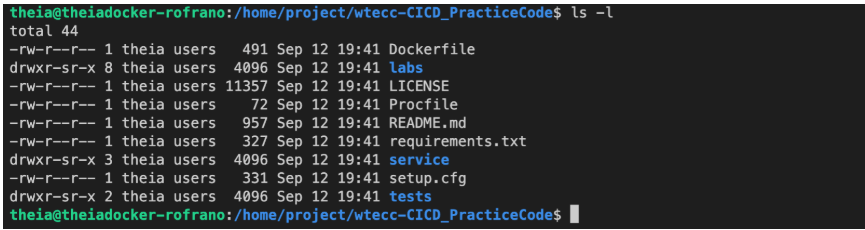

You are now ready to do some scanning.

# Step 8: Running the Scanner

* You now have everything you need to conduct a static analysis on the code. 
* In the terminal, run the command you saved from **“Step 5: Generate SonarQube Token”**.
* It should look similar to the following:

```
### THIS IS AN EXAMPLE ONLY ### DO NOT PASTE THIS ###
sonar-scanner \
   -Dsonar.projectKey=temp \
   -Dsonar.sources=. \
   -Dsonar.host.url=https://{YOUR SONARQUBE URL} \
   -Dsonar.login={YOUR PROJECT TOKEN}
```


## Your Task

1. Paste your own command from SonarQube that you generated in **Step 5**. Your command has all of the parameters, including the project token, to allow the scan to work. Do not use the example code above.
2. Once you hit enter, the scanner starts a static analysis in your current project directory and will run for a while.

When the scan completes, the end of the output should look like the following:

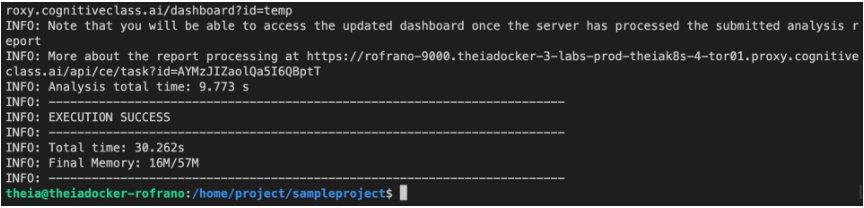

# Step 9: Interpret the scan results

* Once the code scan and analysis are done, you can view the results on the SonarQube UI. 
* It might be easier to see the results in a new browser window. 
* You can press the **`[Launch SonarQube UI in Browser]`** button to open a new browser window with the results.

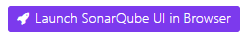

If you view the report, you will see that the overall report is passing, but there is one security item that is flagged.

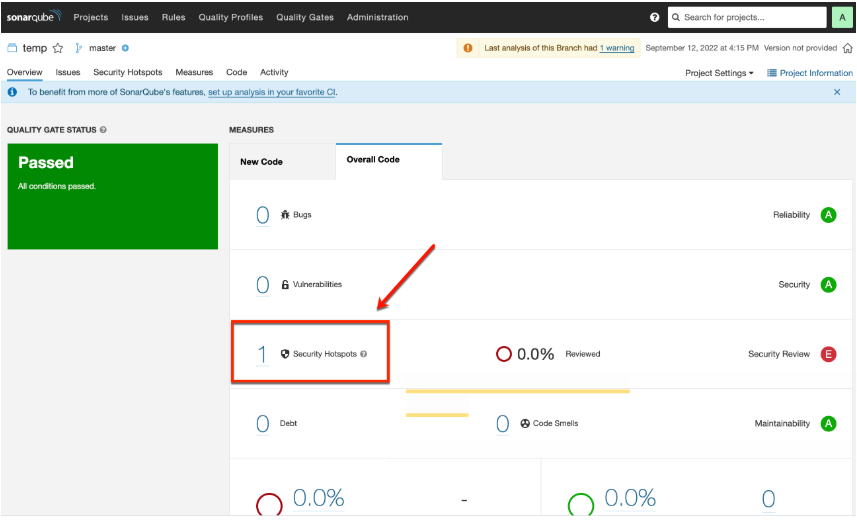

If you click the link for the **1** next to **Security** Hotspots you will see some information about it.

Across the top tabs you can see the following labels:
* **Where is the risk?**
* **What’s the risk?**
* **Assess the risk**
* **How can I fix it?**

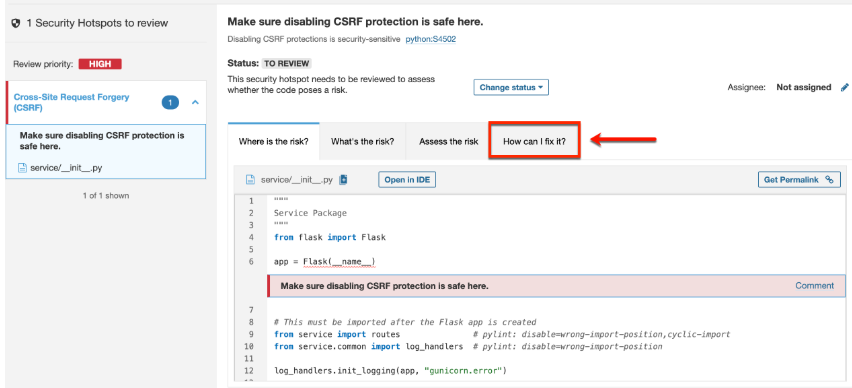

Under the **Where is the risk?** tab, the report is telling you that there is a potential Cross Site Request Forgery (CSRF) risk because the sample code we used didn’t include appropriate security measures to protect it.

Your next question might be, “How can I fix it?” You can find that out by clicking the **How can I fix it?** tab.

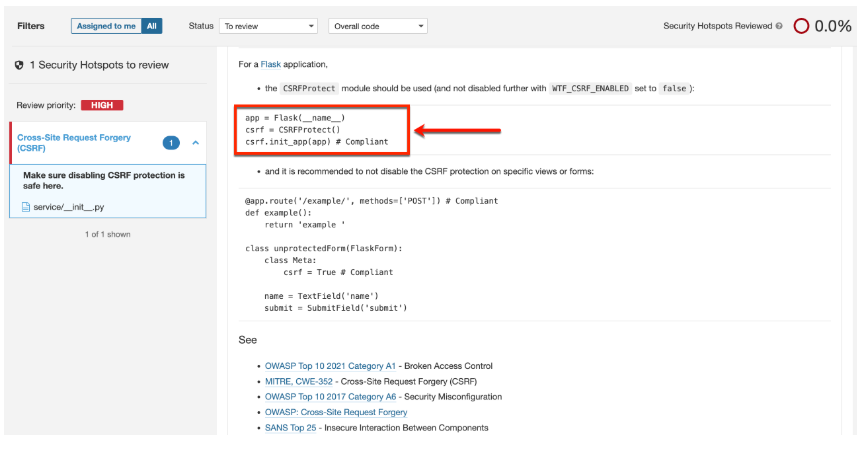

The **How can I fix it?** tab gives you some things to look out for.

This application is written using the Flask framework. If you scroll down to the section about Flask, it tells you exactly how to use the **`CSRFProtect`** class to fix the problem, along with some other advice.

```
app = Flask(__name__)
csrf = CSRFProtect()
csrf.init_app(app) # Compliant
```

If this were your original code, you would want to make the suggested changes to your application and run the scan again to be sure that it was fixed.

# Conclusion

Congratulations! You have completed this lab on static analysis, which is an integral step in secure app development. You are now well on your way to making your applications safer by running static analysis security scans on them.

You now understand how static analysis can be used to detect vulnerabilities in a project. You also know how to get started with open-source tools like SonarQube to perform static analyses.

# Next Steps

Detecting the different kinds of vulnerabilities is just one of the first steps in secure app development. You also need to understand the meaning behind those vulnerabilities in order to take correct actions. There is no better way to learn than by doing.

Your next challenge is to set up SonarQube in your development environment, perform security scans on your code, and fix the problems that it finds. You are well on your way to writing more secure code!